## Compare synthetic and natural DNA

### Imports

In [1]:
import numpy as np
import h5py
import os
import sys
import glob
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
import time

root = tk.Tk()
root.withdraw()

''

## Comparison 

In [96]:
# get various statistics about the raw signals
# inpuit must be fast5 files
def get_stats(folder, f5_type):
    start_time = time.time()
    limit = 1e6
    count = 0
    std_list = []
    med_list = []
    mean_list = []
    perc25 = []
    perc75 = []
    signal_size_list = []
    files = glob.glob(folder + "/*.fast5")
    for fast5File in files:

        if not fast5File.endswith('fast5'):
            print("Not a fast5 file")
            return
        try:
            fast5_data = h5py.File(fast5File, 'r')
        except IOError:
            print('Error opening file')
            return

        if f5_type == 'multi':
            read_list = list(fast5_data.items())
            for i in range(len(read_list)):
                readstep = (read_list[i])
                read = readstep[0]
                raw_id = fast5_data[read+'/Raw'].attrs['read_id'].decode('UTF-8')
                signal_path = read + '/Raw/Signal'
                # get the read_id
                read_id = fast5_data[read+'/Raw'].attrs['read_id'].decode('UTF-8')
                # get the signal
                
                raw_signal = np.array(fast5_data.get(signal_path), dtype=np.float32)

                if(count < limit):
                    mean = np.mean(raw_signal)
                    med = np.median(raw_signal)
                    std = np.std(raw_signal)
                    percentiles = np.percentile(raw_signal, [0, 25, 50, 75, 100])
                    per_high = percentiles[3]
                    per_low = percentiles[1]

                    mean_list.append(mean)
                    med_list.append(med)
                    std_list.append(std)
                    perc25.append(per_low)
                    perc75.append(per_high)
                    signal_size_list.append(len(raw_signal))

                    count+= 1
                
                else:
                    break

        elif f5_type == 'single':

                raw_attr = fast5_data['Raw/Reads/']
                read_name = list(raw_attr.keys())[0]
                raw_dat = raw_attr[read_name + '/Signal'][()]
                # get the signal
                
                raw_signal = np.array(raw_dat, dtype=np.float32)

                if(count < limit):
                    mean = np.mean(raw_signal)
                    med = np.median(raw_signal)
                    std = np.std(raw_signal)
                    percentiles = np.percentile(raw_signal, [0, 25, 50, 75, 100])
                    per_high = percentiles[3]
                    per_low = percentiles[1]

                    mean_list.append(mean)
                    med_list.append(med)
                    std_list.append(std)
                    perc25.append(per_low)
                    perc75.append(per_high)
                    signal_size_list.append(len(raw_signal))

                    count+= 1
                
                else:
                    break

        else:
            print('unkown f5 type')
            
        fast5_data.close()
        
    if count == limit:
        print("Limit reached")
    else:
        print("Limit not reached, count", count)

    mean_list = np.array(mean_list)
    med_list = np.array(med_list)
    std_list = np.array(std_list)
    perc25 = np.array(perc25)
    perc75 = np.array(perc75)
    signal_size_list = np.array(signal_size_list)

    dic = {'mean': mean_list,
           'med': med_list,
           'std': std_list,
           'quant 25': perc25,
           'quant 75': perc75,
           'length' : signal_size_list}

    print("Time " + folder + " :" + str(time.time() - start_time))
    return dic




# data visualisation of statistics
def display_stats(dna_synth, dna_nat, save = True):

    # data
    height_synth = []
    height_nat = []
    bars = []
    for key in dna_synth:
        if key != 'length':
            bars.append(key)
            height_synth.append(np.mean(dna_synth[key]))
            height_nat.append(np.mean(dna_nat[key]))

    # bar chart 
    x_pos = np.arange(len(bars))
    plt.xticks(2*x_pos + 0.5, bars)
    plt.title('Natural vs Synthetic DNA statistics')
    plt.bar(np.arange(0, 2*len(bars), 2) + 0.1, height_synth, color = 'brown', label = 'Synthetic')
    plt.bar(np.arange(1, 2*len(bars), 2) - 0.1, height_nat, color = 'green', label = 'Natural')
    plt.legend(loc='lower center', bbox_to_anchor=(1.05, 1))
    if save:
        plt.savefig("/media/victor/USB/MSc_basecall/bar_nat_synth.png")
    plt.show()




# bar chart to compare lengths
def display_lengths(dna_synth, dna_nat, save = True):
    # bar chart for lengths comparison
    plt.title('Natural vs Synthetic DNA for lengths')
    synth_lenths = dna_synth['length']
    nat_lengths = dna_nat['length']
    heights_synth = [np.mean(synth_lenths), np.median(synth_lenths)]
    heights_nat = [np.mean(nat_lengths), np.median(nat_lengths)]
    bars = ['mean len', 'median len']
    plt.xticks(2*np.arange(len(bars)) + 0.5, bars)
    plt.bar(np.arange(0, 2*len(bars), 2) + 0.1, heights_synth, color = 'brown', label = 'Synthetic')
    plt.bar(np.arange(1, 2*len(bars), 2) - 0.1, heights_nat, color = 'green', label = 'Natural')
    plt.legend(loc='lower center', bbox_to_anchor=(1.05, 1))
    if save:
        plt.savefig("/media/victor/USB/MSc_basecall/bar_nat_synth_len.png")
    plt.show()

    




# main
def main(folder_synth, folder_nat):
    dna_synth = get_stats(folder_synth, 'multi')
    dna_nat = get_stats(folder_nat, 'single')
    display_stats(dna_synth, dna_nat, save = False)
    display_lengths(dna_synth, dna_nat, save = False)



In [36]:
folder_synth = filedialog.askdirectory()
folder_nat = filedialog.askdirectory()

dna_synth = get_stats(folder_synth, 'multi')
dna_nat = get_stats(folder_nat, 'single')

Limit reached


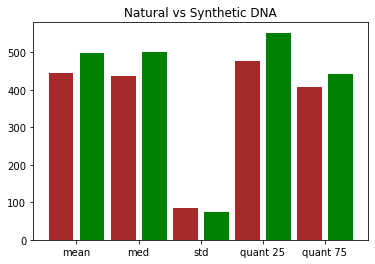

In [37]:
display_stats(dna_synth, dna_nat)


In [97]:
folder_synth = filedialog.askdirectory()
folder_nat = filedialog.askdirectory()

dna_synth = get_stats(folder_synth, 'multi')
dna_nat2 = get_stats(folder_nat, 'single')

Limit reached
Time /media/victor/USB/MSc_basecall/Data/mix_compare_dna/synth :46.53959012031555
Limit not reached, count 2628
Time /media/victor/USB/MSc_basecall/Data/mix_compare_dna/nat_full :35.474735260009766


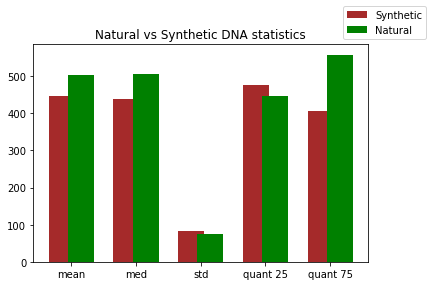

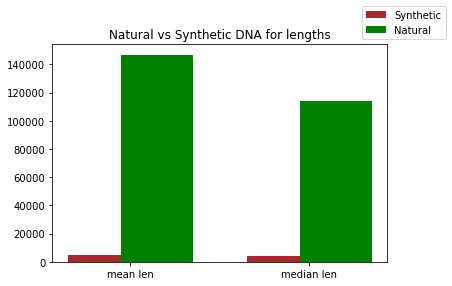

In [98]:
display_stats(dna_synth, dna_nat2)
display_lengths
(dna_synth, dna_nat2)